ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir   = 'IntroDDSJpn/Chap00/'
OutputDir = '0Python-matplotlib/'

Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )
############################################
# 出力先のフォルダ(ディレクトリ)を準備
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/0Python-matplotlib/
 d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/0Python-matplotlib/ is exist.


NumPy: Pythonで数値計算や配列を効率的に行うためのパッケージ
* https://numpy.org/
* NumPy Reference: https://numpy.org/doc/stable/reference/index.html

pandas: Pythonでデータ解析を支援するパッケージ
* https://pandas.pydata.org/
* pandas User Guide: https://pandas.pydata.org/docs/user_guide/index.html
* Excelファイルからデータをデータフレームに読み込む。
* データフレームの列をNumPyのarrayに変換

In [3]:
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
############################################
import pandas as pd
print('pandas     Ver.', pd.__version__)
############################################
# Excelファイルからデータを
# データフレームに読み込む。
#
df_Rdata = pd.read_excel( IpynbDir +
                    'LSQMdata05.xlsx' )
############################################
# データフレームの列をNumPyのarrayに変換
x_i      = np.array( df_Rdata['x_length'    ] )
sigma_xi = np.array( df_Rdata['x_sigma'     ] )
print( x_i )
print( sigma_xi )
#
y_i      = np.array( df_Rdata['y_resistance'] )
sigma_yi = np.array( df_Rdata['y_sigma'     ] )
print( y_i )
print( sigma_yi )

numpy      Ver. 1.26.4
pandas     Ver. 2.2.3
[0.0419 0.0628 0.0898 0.1014 0.1429 0.1445 0.1698 0.1841]
[0.0084 0.0094 0.0105 0.0046 0.007  0.0079 0.0112 0.0049]
[0.074 0.105 0.089 0.14  0.16  0.182 0.214 0.234]
[0.067 0.025 0.031 0.047 0.011 0.01  0.011 0.01 ]


Matplotlib: Python/NumPyのためのグラフ描画パッケージ
* https://matplotlib.org/
* API Reference: https://matplotlib.org/stable/api/index

In [4]:
############################################
# Python/NumPyのためのグラフ描画パッケージ
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)

matplotlib Ver. 3.9.2


散布図でグラフを描く

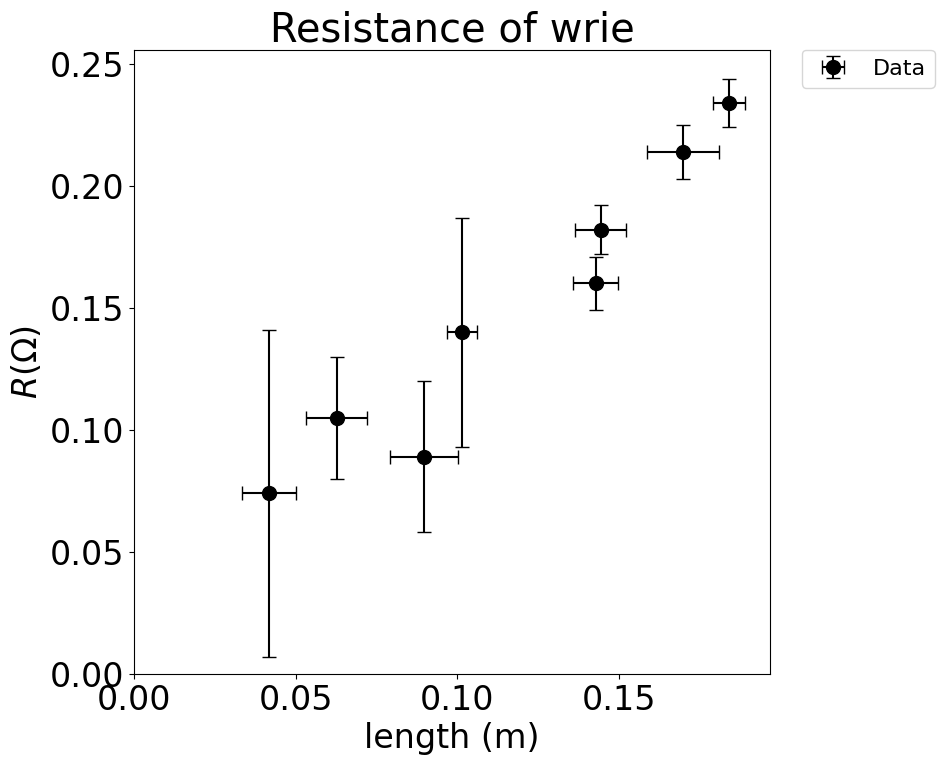

In [5]:
############################################
# 散布図でグラフを描く
#
# デフォルトのフォントサイズを設定
plt.rcParams['font.size'] = 24
#
# 図のサイズを指定して、図オブジェクト生成
fig = plt.figure( figsize=(12,8) )
#
# 図のマージンの調整
fig.subplots_adjust(left=0.12, right=0.65,
                    top=0.90, bottom=0.12)
#
# 1行1列の図の1番目の図の軸を生成
ax1 = fig.add_subplot(1,1,1)
#
# x, y軸のラベルを設定
ax1.set_xlabel( 'length (m)' )
ax1.set_ylabel( r'$R (\Omega)$' )
#
# 誤差棒付きの散布図
ax1.errorbar( x_i, y_i, xerr=sigma_xi,
              yerr=sigma_yi, color='black',
              fmt='o', markersize=10,
              capsize=5, label='Data' )
#
# 軸の範囲の取得
x_left, x_right = ax1.set_xlim()
y_bot,  y_top   = ax1.set_ylim()
#
# 軸の範囲の設定
ax1.set_xlim( 0, x_right )
ax1.set_ylim( 0, y_top   )
#
# 凡例の表示
plt.legend( fontsize=16,
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0)
#
# 図のタイトル
plt.title( r'Resistance of wrie' )
#
# 図の描画
plt.show()
#
# 図をpdfファイルで保存
fig.savefig( FilePath + 'Errorbar-01.pdf' )

$x$, $y$両方の誤差を考慮した最小二乗法

* 各測定値の標準偏差の逆二乗を荷重として用いる
    * $x$軸の荷重
    $$
    w_{x1}:\cdots:w_{xn}=\frac{1}{\sigma_{x1}^{2}}:\cdots:\frac{1}{\sigma_{xn}^{2}},
    W_{x}\equiv\sum_{i=1}^{n}w_{xi}
    $$
    * $y$軸の荷重
    $$
    w_{y1}:\cdots:w_{yn}=\frac{1}{\sigma_{y1}^{2}}:\cdots:\frac{1}{\sigma_{yn}^{2}},
    W_{y}\equiv\sum_{i=1}^{n}w_{yi}
    $$
* $y$軸値の荷重和
$$
\overline{y} = \sum_{i=1}^{n} w_{yi}y_{i}
$$

In [6]:
############################################
# x軸 荷重
w_xi = 1/(sigma_xi**2)
#
# x軸 荷重の和
W_x = np.sum( w_xi )
#
# y軸 荷重
w_yi = 1/(sigma_yi**2)
#
# x軸 荷重の和
W_y = np.sum( w_yi )
#
############################################
overline_y = np.sum( w_yi * y_i )

【漸近法】

* まず$X_{i}$の初期値として測定値の$x_{i}$を用いる。

1. 現在の$X_{i}$を用いて以下を計算する。
  $$
  \overline{X}     = \sum_{i=1}^{n}w_{yi}X_{i},\;\;\;\;\;\;
  \overline{X^{2}} = \sum_{i=1}^{n}w_{yi}X_{i}^{2},\;\;\;\;\;\;
  \overline{Xy}    = \sum_{i=1}^{n}w_{yi}X_{i}y_{i}
  $$
  $$
  \Delta = W_{y}\overline{X^{2}} - (\overline{X})^{2}
  $$
  これらを用いて$a$,$b$を計算する。
  $$
  a=\frac{1}{\Delta}(W_y \overline{Xy}-\overline{X}\overline{y}),
  \;\;\;\;\;\;
  b=\frac{1}{\Delta}(\overline{X^{2}}\overline{y}-\overline{X}\,\overline{Xy})
  $$

2. $a$, $b$を次式に代入し、$X_{i}$を更新する。
  $$
  X_{i}
  =
  \frac{
    w_{xi}x_{i}+a(y_{i}-b)w_{yi}
  }{
    w_{xi}+a^{2}w_{yi}
  }
  $$

3. $a$, $b$が収束するまで1., 2.を繰り返す。

  以下のプログラムでは、1回のループ$\ell$での$a$, $b$値の更新において、以下の条件で収束判定をしている。
  $$
  \frac{a_{\ell}-a_{\ell-1}}{a_{\ell}},\,
  \frac{b_{\ell}-a_{\ell-1}}{b_{\ell}}>1.0\times10^{-6}
  $$

In [7]:
############################################
X_i = np.copy( x_i )
#
loops    = 0
max_loop = 100
#
a_prev  = 0.0
b_prev  = 0.0
a_rerr  = 1.0
b_rerr  = 1.0
#
rel_err = 1.0E-6
#
while (loops < max_loop) & ( (a_rerr>rel_err) | (b_rerr>rel_err) ) :
  #
  overline_X  = np.sum( w_yi * X_i )
  overline_X2 = np.sum( w_yi * X_i**2 )
  overline_Xy = np.sum( w_yi * X_i * y_i )
  #
  Delta       = W_y * overline_X2 - overline_X**2
  #
  a = (W_y * overline_Xy - overline_X * overline_y) / Delta
  b = (overline_X2 * overline_y - overline_X * overline_Xy) / Delta
  a_rerr = np.abs( (a - a_prev) / a )
  b_rerr = np.abs( (b - b_prev) / b )
  #
  X_i_str = '['
  for XX_i in X_i:
    X_i_str = X_i_str + '%.8f ' % XX_i
  #
  X_i_str = X_i_str + ']'
  #
  print( '%04d: X_i = %s, a=%+.8f, b=%+.8f, a_rerr=%.2E, b_rerr=%.2E' % (loops, X_i_str, a, b, a_rerr, b_rerr)  )
  #
  X_i = ( w_xi * x_i + a * (y_i - b) * w_yi ) / ( w_xi + a**2 * w_yi)
  #
  a_prev = a
  b_prev = b
  #
  loops = loops + 1
#
############################################
# 解析結果を描くXの範囲
XX_i = np.linspace( 0.0, 0.2, num=10,
                    endpoint=True )
YY_i = a * XX_i + b

0000: X_i = [0.04190000 0.06280000 0.08980000 0.10140000 0.14290000 0.14450000 0.16980000 0.18410000 ], a=+1.24364060, b=-0.00047747, a_rerr=1.00E+00, b_rerr=1.00E+00
0001: X_i = [0.04232689 0.06674977 0.08710974 0.10156872 0.13756168 0.14559453 0.17143787 0.18530263 ], a=+1.24543515, b=-0.00063059, a_rerr=1.44E-03, b_rerr=2.43E-01
0002: X_i = [0.04232897 0.06675926 0.08710606 0.10156861 0.13752791 0.14555262 0.17136227 0.18526480 ], a=+1.24602798, b=-0.00066874, a_rerr=4.76E-04, b_rerr=5.71E-02
0003: X_i = [0.04232942 0.06676060 0.08710333 0.10156843 0.13751290 0.14553386 0.17133115 0.18524959 ], a=+1.24624387, b=-0.00067930, a_rerr=1.73E-04, b_rerr=1.55E-02
0004: X_i = [0.04232952 0.06676061 0.08710194 0.10156833 0.13750640 0.14552571 0.17131817 0.18524332 ], a=+1.24632785, b=-0.00068259, a_rerr=6.74E-05, b_rerr=4.82E-03
0005: X_i = [0.04232954 0.06676049 0.08710129 0.10156828 0.13750362 0.14552222 0.17131272 0.18524070 ], a=+1.24636182, b=-0.00068373, a_rerr=2.73E-05, b_rerr=1.68E-0

散布図で描いたグラフと解析結果を描く

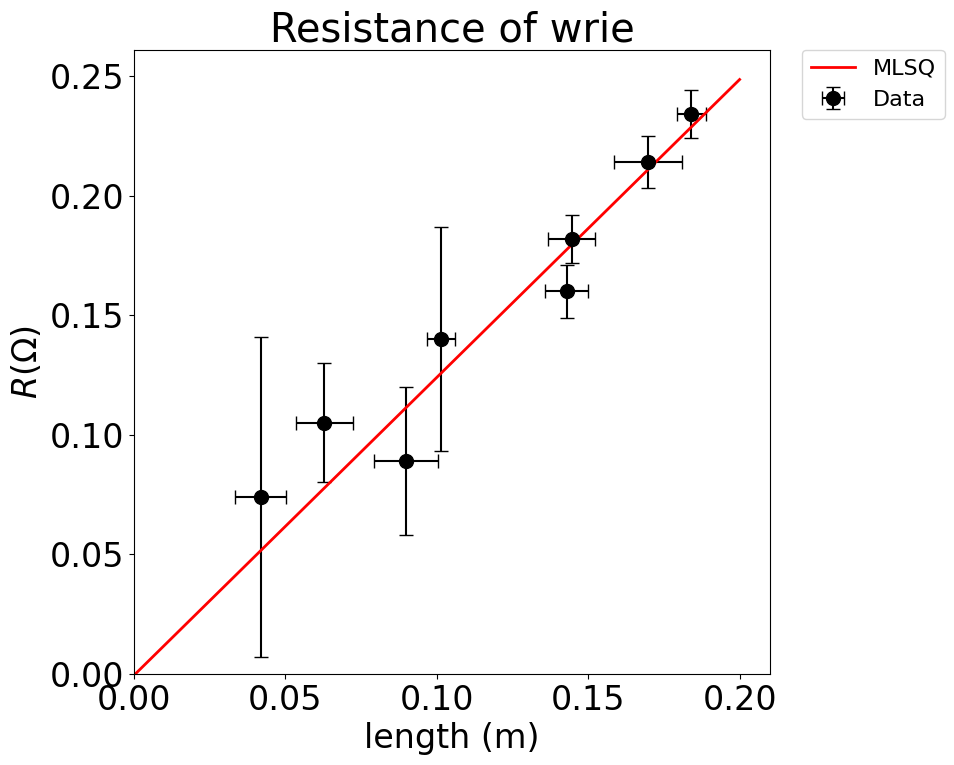

In [8]:
############################################
# 散布図で描いたグラフと解析結果を描く
#
# デフォルトのフォントサイズを設定
plt.rcParams['font.size'] = 24
#
# 図のサイズを指定して、図オブジェクト生成
fig = plt.figure( figsize=(12,8) )
#
# 図のマージンの調整
fig.subplots_adjust(left=0.12, right=0.65,
                    top=0.90, bottom=0.12)
#
# 1行1列の図の1番目の図の軸を生成
ax1 = fig.add_subplot(1,1,1)
#
# x, y軸のラベルを設定
ax1.set_xlabel( 'length (m)' )
ax1.set_ylabel( r'$R (\Omega)$' )
#
# 誤差棒付きの散布図
ax1.errorbar( x_i, y_i, xerr=sigma_xi,
              yerr=sigma_yi, color='black',
              fmt='o', markersize=10,
              capsize=5, label='Data' )
#
# 解析結果を折れ線グラフで描く
ax1.plot( XX_i, YY_i, color='red',
          linewidth=2.0, linestyle='solid',
          label='MLSQ' )
#
# 軸の範囲の取得
x_left, x_right = ax1.set_xlim()
y_bot,  y_top   = ax1.set_ylim()
#
# 軸の範囲の設定
ax1.set_xlim( 0, x_right )
ax1.set_ylim( 0, y_top   )
#
# 凡例の表示
plt.legend( fontsize=16,
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0)
#
# 図のタイトル
plt.title( r'Resistance of wrie' )
#
# 図の描画
plt.show()
#
# 図をpdfファイルで保存
fig.savefig( FilePath + 'Plot-01.pdf' )

模擬データとして、正規分布でデータセットを用意する

In [9]:
############################################
# 模擬データとして、正規分布で
# データセットを用意する
data_set = np.random.normal( loc=3.1,
                             scale=2.0,
                             size=100 )
#
# 平均値
data_mean = np.mean( data_set )
#
# 標準偏差
data_std  = np.std( data_set )

ヒストグラムと箱ひげ図を描く

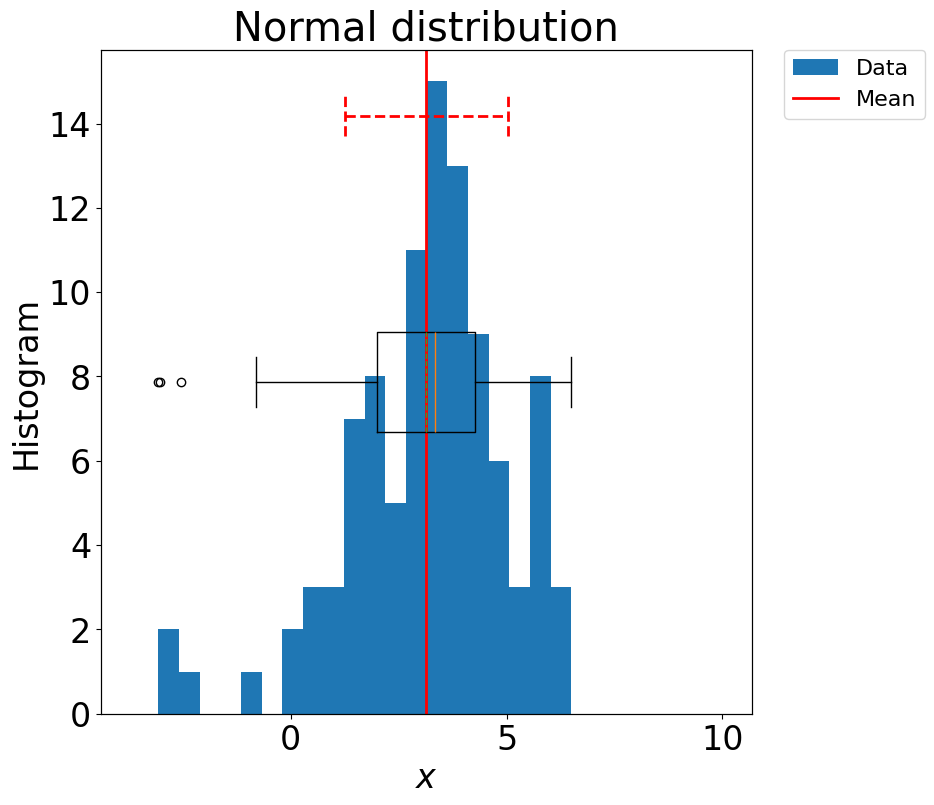

In [10]:
############################################
#
# デフォルトのフォントサイズを設定
plt.rcParams['font.size'] = 24
#
# 図のサイズを指定して、図オブジェクト生成
fig = plt.figure( figsize=(10.5,8) )
#
# 図のマージンの調整
fig.subplots_adjust(left=0.13, right=0.75,
                    top=0.95, bottom=0.12)
#
# 1行1列の図の1番目の図の軸を生成
ax1 = fig.add_subplot(1,1,1)
#
# x, y軸のラベルを設定
ax1.set_xlabel( r'$x$' )
ax1.set_ylabel( 'Histogram' )
#
# x軸の範囲を設定
ax1.set_xlim( data_mean - 4 * data_std,
              data_mean + 4 * data_std )
#
# ヒストグラムを描く
ax1.hist( data_set, bins=20,
          label='Data' )
#
# y軸の範囲を取得
y_bot, y_top = ax1.set_ylim()
#
# y軸の範囲を設定
ax1.set_ylim( 0, y_top )
#
# 平均値を縦破線で描く
ax1.axvline( data_mean, color='red',
             linewidth=2.0,
             linestyle='solid',
             label='Mean' )
#
# 標準偏差の範囲を描く
ax1.hlines( 0.9*y_top,
            data_mean - data_std,
            data_mean + data_std,
            linewidth=2.0,
            color='red',
            linestyle='dashed' )
ax1.vlines( data_mean - data_std,
            0.87*y_top, 0.93*y_top,
            linewidth=2.0,
            color='red',
            linestyle='dashed' )
ax1.vlines( data_mean + data_std,
            0.87*y_top, 0.93*y_top,
            linewidth=2.0,
            color='red',
            linestyle='dashed' )
#
# 凡例の表示
plt.legend( fontsize=16,
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0)
#
# 箱ひげ図のためのy軸(右軸)を用意
ax2 = ax1.twinx()
#
# 箱ひげ図
ax2.boxplot( data_set, vert=False,
             meanline=True,
             showmeans=True )
#
# 箱ひげ図の縦軸(右軸)の目盛り消去
ax2.set_yticks([])
#
# 図のタイトル
plt.title( r'Normal distribution' )
#
# 図の描画
plt.show()
#
# 図をpdfファイルで保存
fig.savefig( FilePath + 'Hist-Boxplot-01.pdf' )